## it's hard to visually compare 2 images' greenness
maybe reordering the pixels will help


In [8]:
from PIL import Image
from IPython.display import display
import numpy as np
from skimage.filters import threshold_otsu
import cv2

In [2]:
def display_image(filename):
    base_image_loc = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\'
    base_image_loc = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\'
    img = Image.open(f'{base_image_loc}{filename}')
    img_resized = img.resize((400, 200))
    display(img_resized)

In [15]:
def get_gvi_score(image_path):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b

    # Apply Otsu's thresholding on ExG
    threshold = threshold_otsu(exg)
    green_pixels = (exg > threshold).sum()
    total_pixels = original_image.shape[0] * original_image.shape[1]

    print(f"green pixels: {green_pixels}")
    print(f"total pixels: {total_pixels}")
    

    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100

    return gvi_score

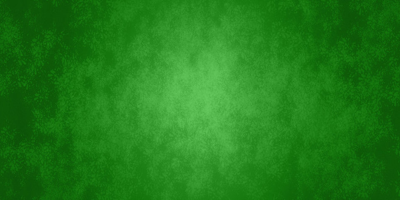

In [5]:
display_image('green_shading.jpeg')

In [16]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\green_shading.jpeg'
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'

get_gvi_score(image_path)

green pixels: 16559735
total pixels: 16588800


99.82479142554013

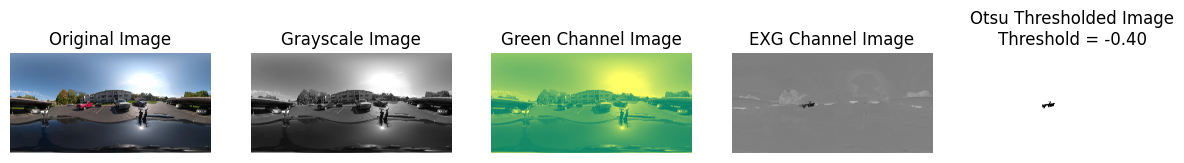

GVI Score: 99.82479142554013 : Otsu Threshold: -0.39614740014076233
green pixels: 16559735
total pixels: 16588800


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

def display_gvi_score(image_path):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    #generate gray image
    gray_image = color.rgb2gray(rgb_image)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b

    # Apply Otsu's thresholding on ExG
    threshold = threshold_otsu(exg)
    green_pixels = (exg > threshold).sum()

    total_pixels = original_image.shape[0] * original_image.shape[1]

    #pseudo_grayscale? Using Green?
    green_grayscale = exg > threshold

    
    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100


    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    ax = axes.ravel()
    
    ax[0].imshow(rgb_image, cmap=plt.cm.gray)
    ax[0].set_title('Original Image')
    
    ax[1].imshow(gray_image, cmap=plt.cm.gray)
    ax[1].set_title('Grayscale Image')

    ax[2].imshow(g, cmap=plt.cm.summer)
    ax[2].set_title('Green Channel Image')

    ax[3].imshow(exg, cmap=plt.cm.gray)
    ax[3].set_title('EXG Channel Image')
    
    ax[4].imshow(green_grayscale, cmap=plt.cm.gray)
    ax[4].set_title(f'Otsu Thresholded Image\nThreshold = {threshold:.2f}')
    
    for a in ax:
        a.axis('off')
    
    plt.show()

    print(f"GVI Score: {gvi_score} : Otsu Threshold: {threshold}")
    print(f"green pixels: {green_pixels}")
    print(f"total pixels: {total_pixels}")

image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
display_gvi_score(image_path)

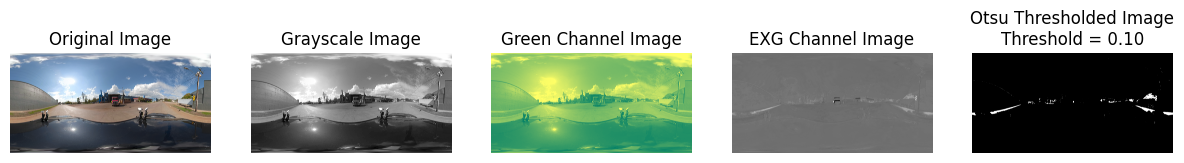

GVI Score: 1.0203149112654322 : Otsu Threshold: 0.10405176877975464
green pixels: 169258
total pixels: 16588800


In [38]:
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\586514342338532.jpeg'
display_gvi_score(image_path)

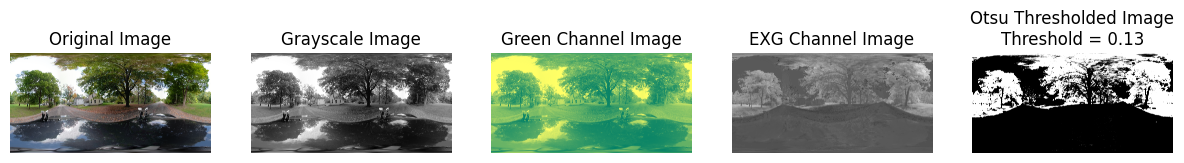

GVI Score: 32.88454861111111 : Otsu Threshold: 0.1262178272008896
green pixels: 5455152
total pixels: 16588800


In [39]:
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\348612820196956.jpeg'
display_gvi_score(image_path)

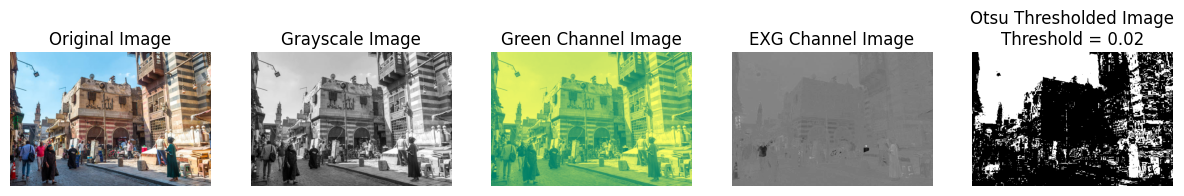

GVI Score: 34.2973055235166 : Otsu Threshold: 0.02025122195482254
green pixels: 85639
total pixels: 249696


In [40]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\cairo.jpeg'
display_gvi_score(image_path)

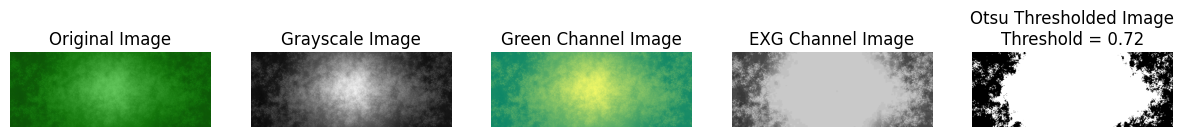

GVI Score: 72.19398340248962 : Otsu Threshold: 0.7174249887466431
green pixels: 250542
total pixels: 347040


In [41]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\green_shading.jpeg'
display_gvi_score(image_path)

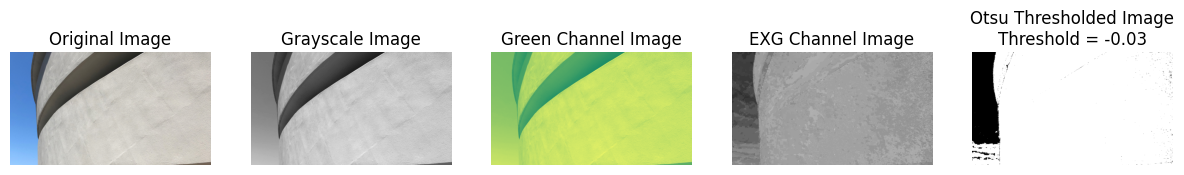

GVI Score: 89.72502601456816 : Otsu Threshold: -0.031188756227493286
green pixels: 3104127
total pixels: 3459600


In [227]:

image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\gray_building_veryblue_sky.jpeg'
display_gvi_score(image_path)

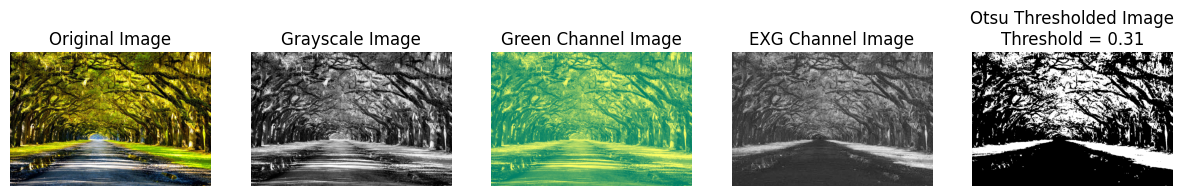

GVI Score: 31.20645491803279 : Otsu Threshold: 0.31450676918029785
green pixels: 341124
total pixels: 1093120


In [228]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\midlevel_canopy.jpeg'
display_gvi_score(image_path)


## Modified where otsu is done on grayscale


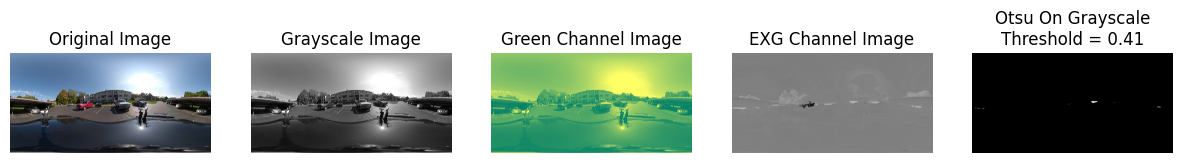

GVI Score: 0.057629243827160496 : Otsu Threshold: 0.412109375
green pixels: 9560
total pixels: 16588800


In [241]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

def display_gvi_score_grayotsu(image_path):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    #generate gray image
    gray_image = color.rgb2gray(rgb_image)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b

    # Apply Otsu's thresholding on ExG
    threshold = threshold_otsu(gray_image)
    green_pixels = (exg > threshold).sum()

    total_pixels = original_image.shape[0] * original_image.shape[1]

    #pseudo_grayscale? Using Green?
    green_grayscale = exg > threshold

    
    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100


    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    ax = axes.ravel()
    
    ax[0].imshow(rgb_image, cmap=plt.cm.gray)
    ax[0].set_title('Original Image')
    
    ax[1].imshow(gray_image, cmap=plt.cm.gray)
    ax[1].set_title('Grayscale Image')

    ax[2].imshow(g, cmap=plt.cm.summer)
    ax[2].set_title('Green Channel Image')

    ax[3].imshow(exg, cmap=plt.cm.gray)
    ax[3].set_title('EXG Channel Image')
    
    ax[4].imshow(green_grayscale, cmap=plt.cm.gray)
    ax[4].set_title(f'Otsu On Grayscale\nThreshold = {threshold:.2f}')
    
    for a in ax:
        a.axis('off')
    
    plt.show()

    print(f"GVI Score: {gvi_score} : Otsu Threshold: {threshold}")
    print(f"green pixels: {green_pixels}")
    print(f"total pixels: {total_pixels}")

image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
display_gvi_score_grayotsu(image_path)

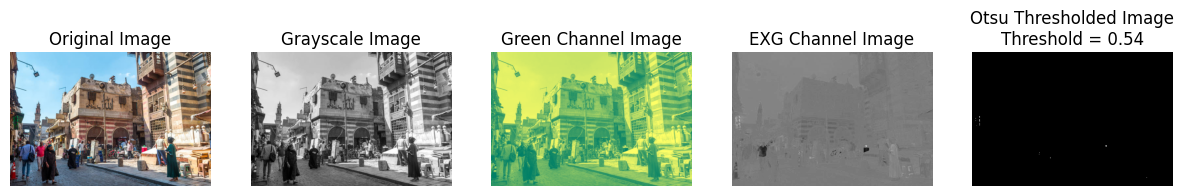

GVI Score: 0.02242727156221966 : Otsu Threshold: 0.544921875
green pixels: 56
total pixels: 249696


In [44]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\cairo.jpeg'
display_gvi_score_grayotsu(image_path)

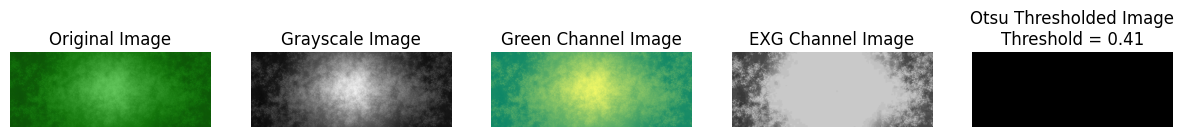

GVI Score: 100.0 : Otsu Threshold: 0.40573883731617655
green pixels: 347040
total pixels: 347040


In [45]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\green_shading.jpeg'
display_gvi_score_grayotsu(image_path)

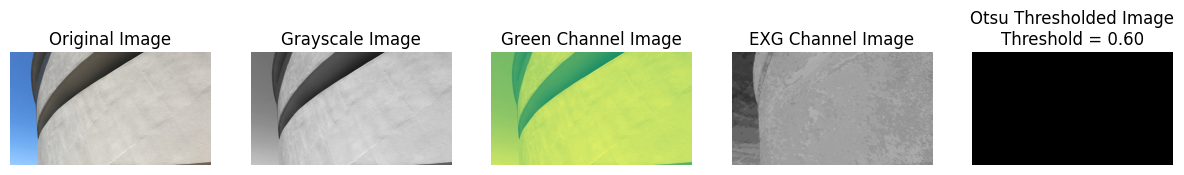

GVI Score: 0.0 : Otsu Threshold: 0.6002214223345588
green pixels: 0
total pixels: 3459600


In [226]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\gray_building_veryblue_sky.jpeg'
display_gvi_score_grayotsu(image_path)

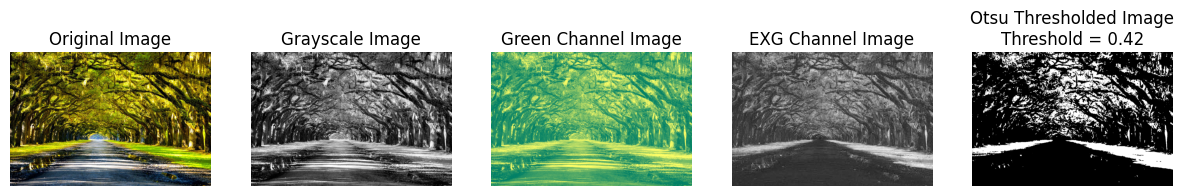

GVI Score: 21.42518662177986 : Otsu Threshold: 0.419921875
green pixels: 234203
total pixels: 1093120


In [229]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\midlevel_canopy.jpeg'
display_gvi_score_grayotsu(image_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

def display_gvi_score_wo_otsu(image_path):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    #generate gray image
    gray_image = color.rgb2gray(rgb_image)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b

    # Apply Otsu's thresholding on ExG
    threshold = threshold_otsu(exg)
    green_pixels = (exg > threshold).sum()

    total_pixels = original_image.shape[0] * original_image.shape[1]

    #pseudo_grayscale? Using Green?
    green_grayscale = exg > threshold

    
    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100


    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    ax = axes.ravel()
    
    ax[0].imshow(rgb_image, cmap=plt.cm.gray)
    ax[0].set_title('Original Image')
    
    ax[1].imshow(gray_image, cmap=plt.cm.gray)
    ax[1].set_title('Grayscale Image')

    ax[2].imshow(exg, cmap=plt.cm.summer)
    ax[2].set_title('EXG Channel Image')
    
    ax[3].imshow(green_grayscale, cmap=plt.cm.gray)
    ax[3].set_title(f'Otsu Thresholded Image\nThreshold = {threshold:.2f}')
    
    for a in ax:
        a.axis('off')
    
    plt.show()

    print(gvi_score)
    
display_gvi_score(image_path)

In [ ]:
def get_rgb_arrays(image_path):
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b


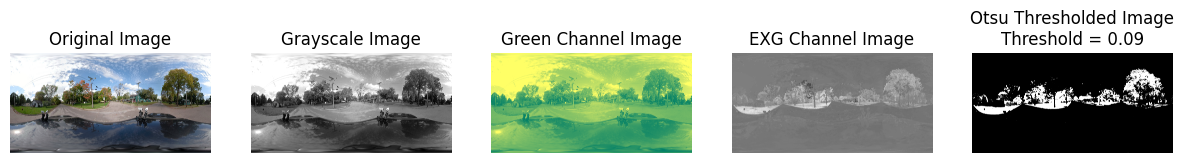

GVI Score: 9.53883945794753 : Otsu Threshold: 0.0869944840669632
green pixels: 1582379
total pixels: 16588800


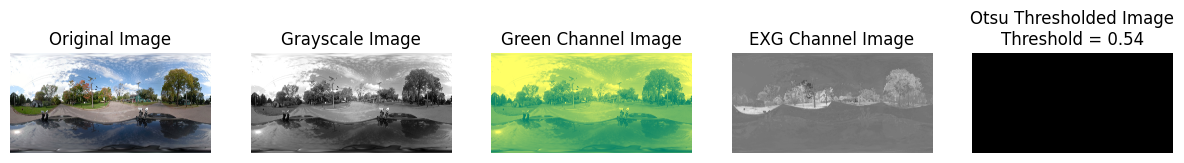

GVI Score: 0.0 : Otsu Threshold: 0.544921875
green pixels: 0
total pixels: 16588800


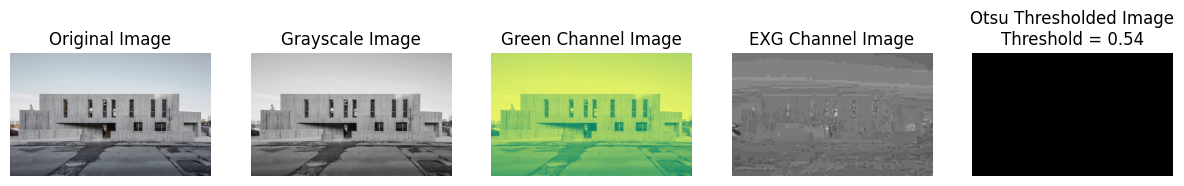

GVI Score: 0.0 : Otsu Threshold: 0.5434330369178922
green pixels: 0
total pixels: 883200


In [223]:
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\479523183161535.jpeg'
display_gvi_score(image_path)


image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\479523183161535.jpeg'
display_gvi_score_grayotsu(image_path)

image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\gray_building.jpeg'
display_gvi_score_grayotsu(image_path)



In [249]:
def display_gvi_score_multi(image_path, otsu=False, brightness_thresh=50):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    #generate gray image
    gray_image = color.rgb2gray(rgb_image)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b

    if otsu==True:
        # Apply Otsu's thresholding on ExG
        threshold = threshold_otsu(gray_image)
    else:
        threshold = brightness_thresh / 255
        
    green_pixels = (exg > threshold).sum()

    total_pixels = original_image.shape[0] * original_image.shape[1]

    #pseudo_grayscale? Using Green?
    green_grayscale = exg > threshold

    
    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100


    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    ax = axes.ravel()
    
    ax[0].imshow(rgb_image, cmap=plt.cm.gray)
    ax[0].set_title('Original Image')
    
    ax[1].imshow(gray_image, cmap=plt.cm.gray)
    ax[1].set_title('Grayscale Image')

    ax[2].imshow(g, cmap=plt.cm.summer)
    ax[2].set_title('Green Channel Image')

    ax[3].imshow(exg, cmap=plt.cm.gray)
    ax[3].set_title('EXG Channel Image')
    
    ax[4].imshow(green_grayscale, cmap=plt.cm.gray)
    ax[4].set_title(f'Otsu Thresholded N/A')
    
    for a in ax:
        a.axis('off')
    
    plt.show()

    print(f"GVI Score: {gvi_score} : Fixed Threshold\nThreshold = {threshold:.2f}")
    print(f"green pixels: {green_pixels}")
    print(f"total pixels: {total_pixels}")

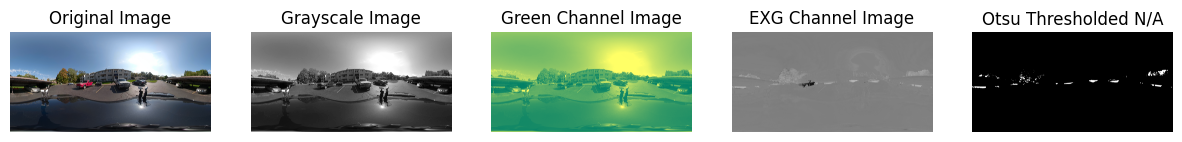

GVI Score: 0.8054169077932098 : Otsu Threshold: 0.19607843137254902
green pixels: 133609
total pixels: 16588800


In [246]:
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
display_gvi_score_multi(image_path)

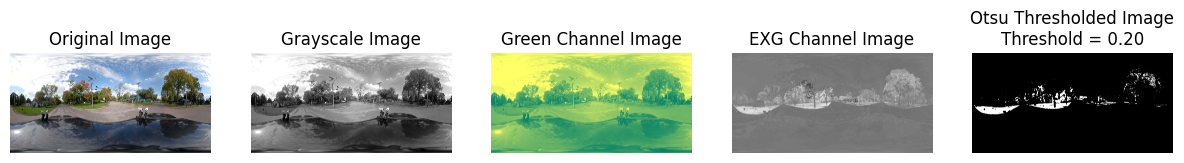

GVI Score: 3.485984519675926 : Otsu Threshold: 0.19607843137254902
green pixels: 578283
total pixels: 16588800


In [59]:
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\479523183161535.jpeg'
display_gvi_score_multi(image_path)

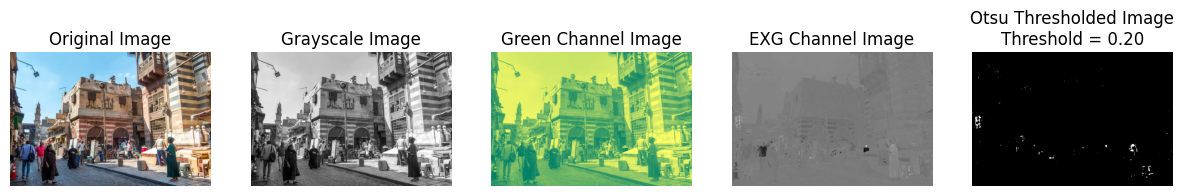

GVI Score: 0.3664455978469819 : Otsu Threshold: 0.19607843137254902
green pixels: 915
total pixels: 249696


In [60]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\cairo.jpeg'
display_gvi_score_multi(image_path)

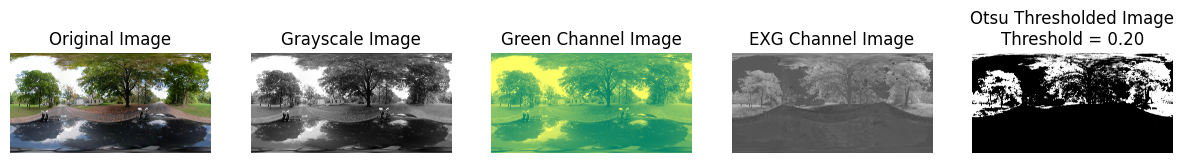

GVI Score: 23.307237413194446 : Otsu Threshold: 0.19607843137254902
green pixels: 3866391
total pixels: 16588800


In [62]:
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\348612820196956.jpeg'
display_gvi_score_multi(image_path)

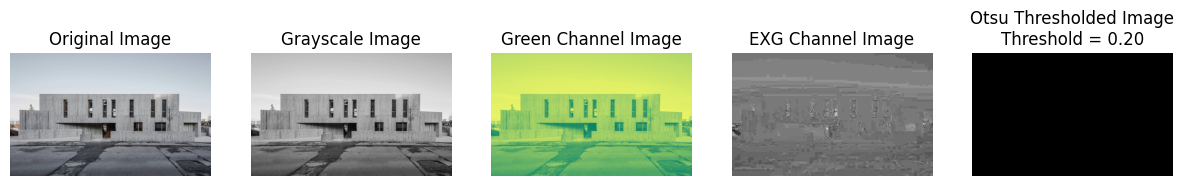

GVI Score: 0.0 : Otsu Threshold: 0.19607843137254902
green pixels: 0
total pixels: 883200


In [222]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\gray_building.jpeg'
display_gvi_score_multi(image_path)

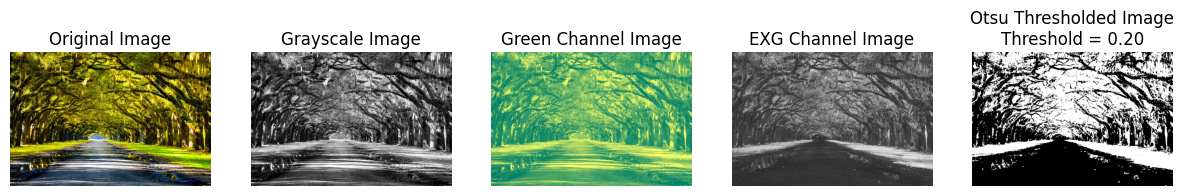

GVI Score: 44.57323990046839 : Otsu Threshold: 0.19607843137254902
green pixels: 487239
total pixels: 1093120


In [230]:
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\midlevel_canopy.jpeg'
display_gvi_score_multi(image_path)

## resequence an image so the pixels that are most green show up first

In [164]:
def get_gvi_score_components(image_path):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b

    # Apply Otsu's thresholding on ExG
    threshold = threshold_otsu(exg)
    green_pixels = (exg > threshold).sum()
    green_pixel_map = (exg > threshold)
    total_pixels = original_image.shape[0] * original_image.shape[1]

    print(f"green pixels: {green_pixels}")
    print(f"total pixels: {total_pixels}")
    print(green_pixels)

    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100
    print(gvi_score)

    return r, g, b, exg, green_pixel_map

In [251]:
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\348612820196956.jpeg'
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\cairo.jpeg'
#image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\gray_building.jpeg'
#image_path = 'D:\\projects\\geo_image_experiments\\data\\reference_images\\midlevel_canopy.jpeg'
r, g, b, exg, green_pixel_map = get_gvi_score_components(image_path)

green pixels: 85639
total pixels: 249696
85639
34.2973055235166


In [252]:
arrays = [r, g, b, exg, green_pixel_map]
for i in range(len(arrays)):
    print(arrays[i].shape)
    orig_shape = arrays[i].shape
    #flatten the arrays for sorting
    arrays[i] = arrays[i].reshape(1, -1)

for i in arrays:
    print(i.shape)






(408, 612)
(408, 612)
(408, 612)
(408, 612)
(408, 612)
(1, 249696)
(1, 249696)
(1, 249696)
(1, 249696)
(1, 249696)


In [253]:
sort_index = np.argsort(arrays[3]) ## sort by exg
sorted_arrays = [array[:, sort_index[0]] for array in arrays]

for i in range(len(sorted_arrays)):
    print(sorted_arrays[i].shape)
    #reconstruct the original shape
    sorted_arrays[i] = sorted_arrays[i].reshape(orig_shape[0], -1)

(1, 249696)
(1, 249696)
(1, 249696)
(1, 249696)
(1, 249696)


In [255]:
for i in sorted_arrays:
    print(i.shape)

(408, 612)
(408, 612)
(408, 612)
(408, 612)
(408, 612)


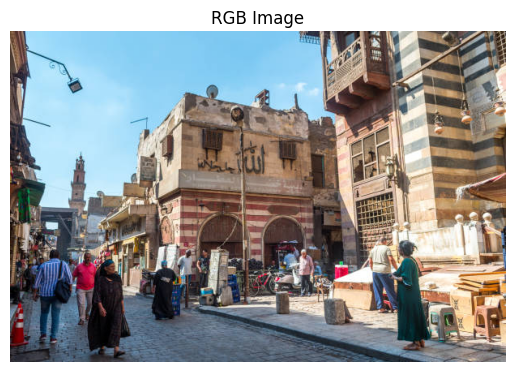

In [256]:
#print original
rgb_image = np.stack((r, g, b), axis=-1)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')  # Hide the axis
plt.show()

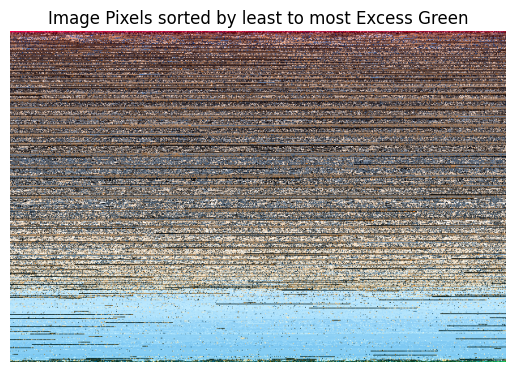

In [257]:
import numpy as np
import matplotlib.pyplot as plt

r = sorted_arrays[0]
g = sorted_arrays[1]
b = sorted_arrays[2]


rgb_image = np.stack((r, g, b), axis=-1)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.title('Image Pixels sorted by least to most Excess Green')
plt.axis('off')  # Hide the axis
plt.show()

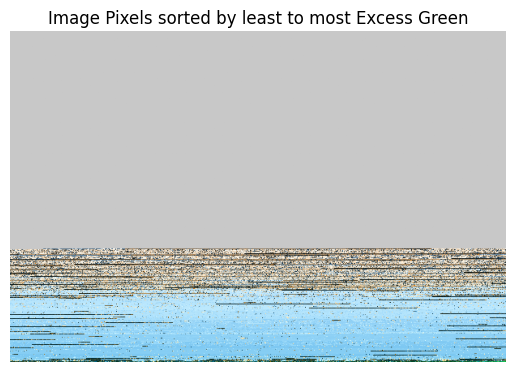

In [258]:
sorted_green_pixel_map = sorted_arrays[4]


r_true = sorted_arrays[0]
g_true = sorted_arrays[1]
b_true = sorted_arrays[2]
r_true[~sorted_green_pixel_map] = 200/255
g_true[~sorted_green_pixel_map] = 200/255
b_true[~sorted_green_pixel_map] = 200/255


rgb_image = np.stack((r_true, g_true, b_true), axis=-1)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.title('Image Pixels sorted by least to most Excess Green')
plt.axis('off')  # Hide the axis
plt.show()

In [185]:
sorted_green_pixel_map

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [186]:
g_true

array([[0.03921569, 0.01176471, 0.        , ..., 0.07450981, 0.01960784,
        0.        ],
       [0.06666667, 0.05882353, 0.05098039, ..., 0.14509805, 0.14509805,
        0.12941177],
       [0.12941177, 0.14509805, 0.14509805, ..., 0.02745098, 0.        ,
        0.03137255],
       ...,
       [0.78431374, 0.78431374, 0.78431374, ..., 0.78431374, 0.78431374,
        0.78431374],
       [0.78431374, 0.78431374, 0.78431374, ..., 0.78431374, 0.78431374,
        0.78431374],
       [0.78431374, 0.78431374, 0.78431374, ..., 0.78431374, 0.78431374,
        0.78431374]], dtype=float32)

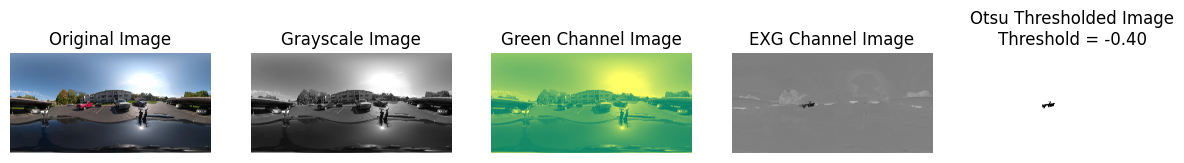

GVI Score: 99.82479142554013 : Otsu Threshold: -0.39614740014076233
green pixels: 16559735
total pixels: 16588800


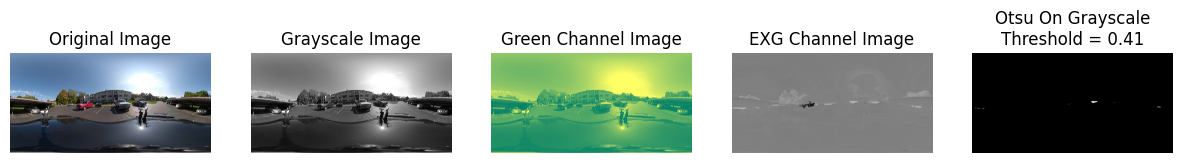

GVI Score: 0.057629243827160496 : Otsu Threshold: 0.412109375
green pixels: 9560
total pixels: 16588800


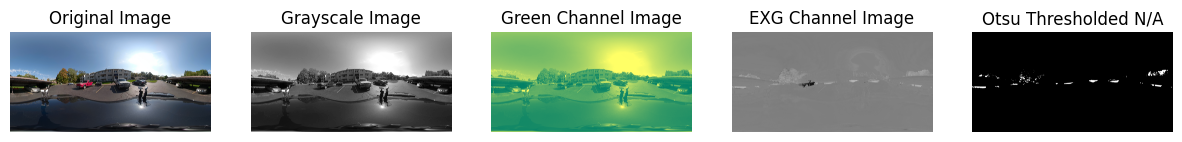

GVI Score: 0.8054169077932098 : Fixed Threshold
Threshold = 0.20
green pixels: 133609
total pixels: 16588800


In [250]:

image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
display_gvi_score(image_path)

image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
display_gvi_score_grayotsu(image_path)

image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
display_gvi_score_multi(image_path)